# **Importation des données**


In [ ]:
#@title
#On commence par importer les données 
import pandas as pd

logement = pd.read_excel("logement.xlsx")
logement.head()

population = pd.read_excel("population.xlsx")
population.head()

valeur = pd.read_csv("valeur.csv")
valeur.head()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2021-305622,2021-01-04,1,Vente,15000.0,4.0,NaN,RUE DE LA PIEMENTE,5445,69009.0,69389,Lyon 9e Arrondissement,69,NaN,NaN,69389000AX0091,NaN,NaN,1020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,4.802697,45.785960
1,2021-305623,2021-01-05,1,Vente,375000.0,46.0,NaN,RUE DOC ALBERIC PONT,2193,69005.0,69385,Lyon 5e Arrondissement,69,NaN,NaN,69385000BO0189,NaN,NaN,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,4.797315,45.754569
2,2021-305623,2021-01-05,1,Vente,375000.0,46.0,NaN,RUE DOC ALBERIC PONT,2193,69005.0,69385,Lyon 5e Arrondissement,69,NaN,NaN,69385000BO0189,NaN,NaN,118.0,98.86,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,108.0,5.0,NaN,NaN,NaN,NaN,NaN,4.797315,45.754569
3,2021-305624,2021-01-04,1,Vente,346050.0,6.0,NaN,RUE MASARYK,4643,69009.0,69389,Lyon 9e Arrondissement,69,NaN,NaN,69389000BC0040,NaN,NaN,160.0,82.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4.0,Local industriel. commercial ou assimilé,82.0,0.0,NaN,NaN,NaN,NaN,NaN,4.807578,45.778875
4,2021-305624,2021-01-04,1,Vente,346050.0,4.0,NaN,RUE MASARYK,4643,69009.0,69389,Lyon 9e Arrondissement,69,NaN,NaN,69389000BC0040,NaN,NaN,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,4.807578,45.778875


# Prix moyen du m² pour les appartements et pour les maisons


Prix moyen pour les appartement et pour les maisons

In [ ]:
#@title
#On télecharge la bibliothèque Numpy, elle permet d’effectuer des calculs numériques avec Python. 
import numpy as np

In [ ]:
#@title
#on retrouve le prix moyen  de mètre carré par appartements
prixmoyen_appart = valeur[valeur.type_local=="Appartement"]
prixm2moyenappart = prixmoyen_appart["valeur_fonciere"].mean()/prixmoyen_appart["surface_reelle_bati"].mean()

print("Prix moyen du m² des appartements : '{:.2f} €'".format(prixm2moyenappart))

Prix moyen du m² des appartements : '5440.14 €'


In [ ]:
#@title
#on obtient le prix moyen du mètre carré par maison
prixmoyen_maison = valeur[valeur.type_local=="Maison"]
prixm2moyenmaison = prixmoyen_maison["valeur_fonciere"].mean()/prixmoyen_maison["surface_reelle_bati"].mean()

print("Prix moyenne du m² des maisons : '{:.2f} €'".format(prixm2moyenmaison))

Prix moyenne du m² des maisons : '3974.87 €'


# Prix médian du m² pour les appartements et pour les maisons 

In [ ]:
#@title
#on obtient le prix median du mètre carré par appartement
valeur_appart = valeur[valeur.type_local=="Appartement"]
prixm2medianappart = valeur_appart["valeur_fonciere"].median()/valeur_appart["surface_reelle_bati"].median()

print("Prix médian du m² des appartements : '{:.2f} €'".format(prixm2medianappart))

Prix médian du m² des appartements : '3553.85 €'


In [ ]:
#@title
#on obtient le prix median du mètre carré par maison
valeur_maison = valeur[valeur.type_local=="Maison"]
prixm2medianmaison = valeur_maison["valeur_fonciere"].median()/valeur_maison["surface_reelle_bati"].median()

print("Prix médian du m² des maisons : '{:.2f} €'".format(prixm2medianmaison))

Prix médian du m² des maisons : '3619.05 €'


In [ ]:
#@title
#mise en forme des données moyen et médian du prix au m² des appartements et maisons
data = {'Appartements':{'Prix moyen du m²':prixm2moyenappart,'Prix médian du m²':prixm2medianappart},'Maisons':{'Prix moyen du m²':prixm2moyenmaison,'Prix médian du m²':prixm2medianmaison}}
df = pd.DataFrame(data=data)
df.style.format({'Appartements': '{:.2f} €','Maisons': '{:.2f} €'})

,Appartements,Maisons
Prix moyen du m²,5440.14 €,3974.87 €
Prix médian du m²,3553.85 €,3619.05 €


# Proportion appartements / maisons, résidences principales / secondaires

In [ ]:
#@title
#On calule le nombre de maisons
nbmaison = sum(logement['P17_MAISON'])
print("Nombre de maison : {:.0f}".format(nbmaison))

Nombre de maison : 262919


In [ ]:
#@title
#On calcule le nombre d'appartements
nbappart = sum(logement['P17_APPART'])
print("Nombre d'appartements : {:.0f}".format(nbappart))

Nombre d'appartements : 639219


In [ ]:
#@title
#On calcule le nombre total de logements 
nblog = sum(logement['P17_LOG'])
print("Nombre total de logements : {:.0f}".format(nblog))

Nombre total de logements : 914980


In [ ]:
#@title
#On calcule le nombre de résidences principales 
nbrp = sum(logement['P17_RP'])
print("Nombre de résidences principales : {:.0f}".format(nbrp))

Nombre de résidences principales : 818114


In [ ]:
#@title
#On calcule le nombre de résidences secondaires occasionnelles 
nbrso = sum(logement['P17_RSECOCC'])
print("Nombre de résidences secondaires occasionnelles : {:.0f}".format(nbrso))

Nombre de résidences secondaires occasionnelles : 28431


In [ ]:
#@title
#On calcule le nombre de résidences de vacances
nbvac = sum(logement['P17_LOGVAC'])
print("Nombre de logements vacances : {:.0f}".format(nbvac))

Nombre de logements vacances : 68435


In [ ]:
#@title
#On calcule la proportion des maisons
propmaison = nbmaison/nblog
print("Proportion des maisons par rapport à l'ensemble : {:.2%}".format(propmaison))

Proportion des maisons par rapport à l'ensemble : 28.73%


In [ ]:
#@title
#On calcule la proportion des appartements
propappart = nbappart/nblog
print("Proportion des appartements par rapport à l'ensemble : {:.2%}".format(propappart))

Proportion des appartements par rapport à l'ensemble : 69.86%


In [ ]:
#@title
#On calcule la proportion des résidences principales
proprp = nbrp/nblog
print("Proportion des résidences principales par rapport à l'ensemble : {:.2%}".format(proprp))

Proportion des résidences principales par rapport à l'ensemble : 89.41%


In [ ]:
#@title
#On calcule la proportion des résidences secondaires occasionnels 
proprso = (nbrso+nbvac)/nblog #on estime que les logements vacances appartiennent aux logements secondaires
print("Proportion des résidences secondaires occasionnels par rapport à l'ensemble : {:.2%}".format(proprso))

Proportion des résidences secondaires occasionnels par rapport à l'ensemble : 10.59%


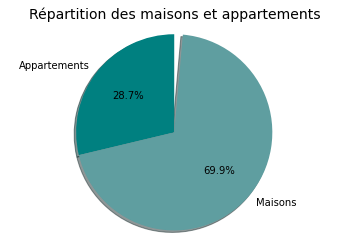

In [ ]:
#@title
#On crée un diagramme circulaire représentant la répartition des maisons et appartements 
import matplotlib.pyplot as plt

labels = 'Appartements', 'Maisons'
sizes = [propmaison, propappart]
colors = ['teal', 'cadetblue']

plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')

plt.savefig('PieChart01.png')
plt.title('Répartition des maisons et appartements', fontsize=14)
plt.show()

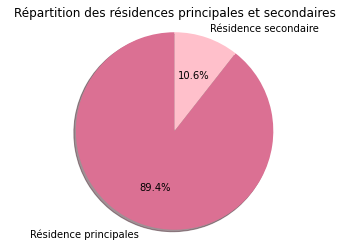

In [ ]:
#@title
#On crée un diagramme circulaire représentant la répartition des résidences principales et secondaires

labels = 'Résidence principales', 'Résidence secondaire',
sizes = [proprp, proprso]
colors = ['palevioletred', 'pink']

plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')

plt.savefig('PieChart01.png')
plt.title('Répartition des résidences principales et secondaires', fontsize=12)
plt.show()

#Distribution du nombre de pièces par logement

In [ ]:

#@title

#Le but est de retirer les valeurs Null et les transformer en 0

valeur['nombre_lots'] = valeur['nombre_lots']. fillna (0) 

valeur['nombre_pieces_principales'] = valeur['nombre_pieces_principales']. fillna (0)

valeur

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2021-305622,2021-01-04,1,Vente,15000.0,4.0,NaN,RUE DE LA PIEMENTE,5445,69009.0,69389,Lyon 9e Arrondissement,69,NaN,NaN,69389000AX0091,NaN,NaN,1020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,4.802697,45.785960
1,2021-305623,2021-01-05,1,Vente,375000.0,46.0,NaN,RUE DOC ALBERIC PONT,2193,69005.0,69385,Lyon 5e Arrondissement,69,NaN,NaN,69385000BO0189,NaN,NaN,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,4.797315,45.754569
2,2021-305623,2021-01-05,1,Vente,375000.0,46.0,NaN,RUE DOC ALBERIC PONT,2193,69005.0,69385,Lyon 5e Arrondissement,69,NaN,NaN,69385000BO0189,NaN,NaN,118.0,98.86,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,108.0,5.0,NaN,NaN,NaN,NaN,NaN,4.797315,45.754569
3,2021-305624,2021-01-04,1,Vente,346050.0,6.0,NaN,RUE MASARYK,4643,69009.0,69389,Lyon 9e Arrondissement,69,NaN,NaN,69389000BC0040,NaN,NaN,160.0,82.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4.0,Local industriel. commercial ou assimilé,82.0,0.0,NaN,NaN,NaN,NaN,NaN,4.807578,45.778875
4,2021-305624,2021-01-04,1,Vente,346050.0,4.0,NaN,RUE MASARYK,4643,69009.0,69389,Lyon 9e Arrondissement,69,NaN,NaN,69389000BC0040,NaN,NaN,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,4.807578,45.778875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32274,2021-320454,2021-06-23,1,Vente,48500.0,6.0,NaN,RUE DE MONTAGNY,1052,69240.0,69248,Thizy-les-Bourgs,69,NaN,NaN,69248025AB0227,NaN,NaN,16.0,NaN,3.0,74.61,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,69.0,3.0,NaN,NaN,NaN,NaN,NaN,4.293690,46.037205
32275,2021-320455,2021-06-29,1,Vente,157000.0,31.0,NaN,RUE DES MESANGES,0067,69830.0,69206,Saint-Georges-de-Reneins,69,NaN,NaN,692060000K0317,NaN,NaN,81.0,57.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,52.0,2.0,NaN,NaN,NaN,NaN,NaN,4.708951,46.058315
32276,2021-320456,2021-04-29,1,Vente,127850.0,259.0,NaN,RUE CHARLES GERMAIN,0298,69400.0,69264,Villefranche-sur-Saône,69,NaN,NaN,69264000AK0028,NaN,NaN,20.0,39.90,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,4.715407,45.992562
32277,2021-320456,2021-04-29,1,Vente,127850.0,259.0,NaN,RUE CHARLES GERMAIN,0298,69400.0,69264,Villefranche-sur-Saône,69,NaN,NaN,69264000AK0028,NaN,NaN,20.0,39.90,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,38.0,2.0,NaN,NaN,NaN,NaN,NaN,4.715407,45.992562


Text(0.5, 1.0, 'Distribution du nombre de pièces par logement')

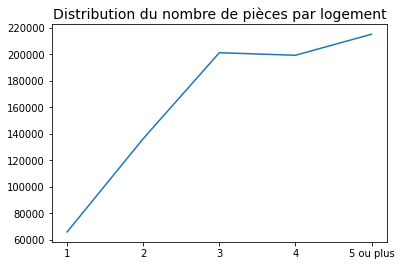

In [ ]:
#@title

#Distribution du nombre de pièces par logement

import matplotlib.pyplot as plt

df = pd.DataFrame({'Nombre de piece par logement':[sum(logement['P17_RP_1P']), sum(logement['P17_RP_2P']), sum(logement['P17_RP_3P']),sum(logement['P17_RP_4P']),sum(logement['P17_RP_5PP']),]})

plt.plot([1,2,3,4,5], df['Nombre de piece par logement'])

plt.xticks([1,2,3,4,5],['1','2','3','4','5 ou plus'])

plt.title('Distribution du nombre de pièces par logement',fontsize = 14)

# Évolution de la population du Rhone depuis 1990

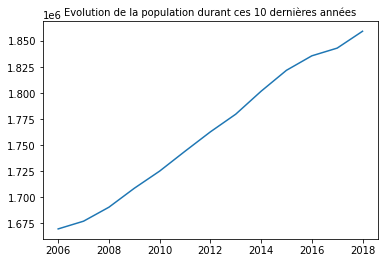

In [ ]:
#@title
# On trace un graphique en courbe qui montre l'évolution de la population durant ces 10 dernières années
names = population.columns[4:33]
names2 = [2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006]
pop = np.sum(population.values[:,4:17], axis=0)

plt.plot(names2, pop) 
plt.title('Evolution de la population durant ces 10 dernières années', fontsize=10)
plt.show() 

# Evolution des construction depuis 1919


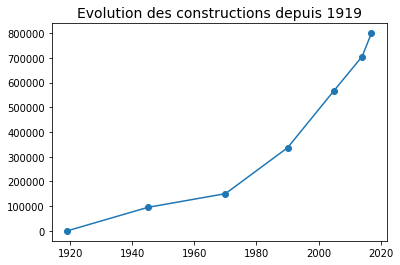

In [ ]:
#@title
# On trace un graphique en courbe avec des points qui montre
# l'évolution des constructions en cumulé depuis c'est 100 dernières années
import matplotlib.pyplot as plt

name = logement.columns[23:29]
names2 = [1919,1945,1970,1990,2005,2014,2017]
conctruction = np.sum(logement.values[:,23:29], axis=0)
Y = [0] + np.cumsum(conctruction).tolist()
plt.scatter(names2, Y)
plt.plot(names2, Y) 
plt.title('Evolution des constructions depuis 1919', fontsize=14)
plt.show() 



#Top : villes les plus / moins chères, avec le plus / le moins de maisons par rapport aux appartements

In [ ]:
#@title
#On veut obtenir un tableau avec les 5 villes les plus chères 
valeur["prix_m2"] = valeur["valeur_fonciere"] / valeur['surface_reelle_bati']

top_villes = pd.DataFrame(valeur.groupby("nom_commune")["prix_m2"].mean())

tophigh = top_villes.sort_values('prix_m2', ascending=False)
tophigh.head(5).style.format({'prix_m2':'{:.2f} €'})

,prix_m2
nom_commune,
Dardilly,68568.90 €
Charbonnières-les-Bains,61116.85 €
Vénissieux,51754.64 €
Champagne-au-Mont-d'Or,34979.00 €
Corbas,28986.10 €


In [ ]:
#@title
#On veut obtenir un tableau avec les 5 villes les moins chères
topless = top_villes.sort_values('prix_m2', ascending=True)
topless.head(5).style.format({'prix_m2':'{:.2f} €'})

,prix_m2
nom_commune,
Ranchal,784.13 €
Meaux-la-Montagne,784.31 €
Saint-Clément-sur-Valsonne,878.83 €
Saint-Nizier-d'Azergues,949.64 €
Saint-Vincent-de-Reins,987.40 €


In [ ]:
#@title
#On cherche le top des villes avec le plus et moins d'appartements ou maisons
valeur_avec_local = valeur.dropna(subset=["type_local"])
#Filtre, on garde pas dépendance & Local industriel
valeur_avec_local = valeur_avec_local[(valeur_avec_local.type_local!='Local industriel. commercial ou assimilé')&(valeur_avec_local.type_local!='Dépendance')]
valeur_prop = valeur_avec_local.groupby("nom_commune").apply(lambda s: pd.Series({
                                                          "prop_appart" : s[s.type_local=='Appartement'].shape[0] / s["type_local"].shape[0],
                                                          "prop_maisons" : s[s.type_local=='Maison'].shape[0] / s["type_local"].shape[0],
                                                        }))
valeur_plus_appart = valeur_prop.sort_values('prop_appart', ascending=False)
valeur_plus_maisons = valeur_prop.sort_values('prop_appart', ascending=True)

valeur_plus_appart.head(5).style.format({'prop_appart' : '{:.2%}', 'prop_maisons' : '{:.2%}'})

,prop_appart,prop_maisons
nom_commune,,
Lyon 2e Arrondissement,100.00%,0.00%
Simandres,100.00%,0.00%
Lyon 1er Arrondissement,100.00%,0.00%
Saint-Clément-sur-Valsonne,100.00%,0.00%
Lyon 7e Arrondissement,99.51%,0.49%


In [ ]:
#@title
valeur_plus_maisons.head(5).style.format({'prop_appart' : '{:.2%}', 'prop_maisons' : '{:.2%}'})

,prop_appart,prop_maisons
nom_commune,,
Affoux,0.00%,100.00%
Saint-Cyr-le-Chatoux,0.00%,100.00%
Saint-Cyr-sur-le-Rhône,0.00%,100.00%
Colombier-Saugnieu,0.00%,100.00%
Le Breuil,0.00%,100.00%


#**Concentrons nous sur une ville en particulier**

In [ ]:
#@title
#On cherche à obtenir une liste avec toutes les villes possibles
ListeVille = []
for i in range(0,len(population['LIBGEO'])):
  ListeVille.append(population['LIBGEO'][i])
print('["'+'","'.join(ListeVille)+'"]')

["Affoux","Aigueperse","Albigny-sur-Saône","Alix","Ambérieux","Amplepuis","Ampuis","Ancy","Anse","L'Arbresle","Les Ardillats","Arnas","Aveize","Azolette","Bagnols","Beaujeu","Belleville-en-Beaujolais","Belmont-d'Azergues","Bessenay","Bibost","Blacé","Val d'Oingt","Le Breuil","Brignais","Brindas","Bron","Brullioles","Brussieu","Bully","Cailloux-sur-Fontaines","Caluire-et-Cuire","Cenves","Cercié","Chambost-Allières","Chambost-Longessaigne","Chamelet","Champagne-au-Mont-d'Or","La Chapelle-sur-Coise","Chaponost","Charbonnières-les-Bains","Charentay","Charly","Charnay","Chasselay","Châtillon","Chaussan","Chazay-d'Azergues","Chénas","Chénelette","Les Chères","Chessy","Chevinay","Chiroubles","Civrieux-d'Azergues","Claveisolles","Cogny","Coise","Collonges-au-Mont-d'Or","Condrieu","Corcelles-en-Beaujolais","Cours","Courzieu","Couzon-au-Mont-d'Or","Craponne","Cublize","Curis-au-Mont-d'Or","Dardilly","Denicé","Dième","Dommartin","Dracé","Duerne","Échalas","Écully","Émeringes","Éveux","Fleurie","F

In [ ]:
#On crée une liste déroulante afin de choisir une ville et l'analyser
#@title Choisir une ville

Ville = "Sainte-Catherine" #@param ["Affoux","Aigueperse","Albigny-sur-Saône","Alix","Ambérieux","Amplepuis","Ampuis","Ancy","Anse","L'Arbresle","Les Ardillats","Arnas","Aveize","Azolette","Bagnols","Beaujeu","Belleville-en-Beaujolais","Belmont-d'Azergues","Bessenay","Bibost","Blacé","Val d'Oingt","Le Breuil","Brignais","Brindas","Bron","Brullioles","Brussieu","Bully","Cailloux-sur-Fontaines","Caluire-et-Cuire","Cenves","Cercié","Chambost-Allières","Chambost-Longessaigne","Chamelet","Champagne-au-Mont-d'Or","La Chapelle-sur-Coise","Chaponost","Charbonnières-les-Bains","Charentay","Charly","Charnay","Chasselay","Châtillon","Chaussan","Chazay-d'Azergues","Chénas","Chénelette","Les Chères","Chessy","Chevinay","Chiroubles","Civrieux-d'Azergues","Claveisolles","Cogny","Coise","Collonges-au-Mont-d'Or","Condrieu","Corcelles-en-Beaujolais","Cours","Courzieu","Couzon-au-Mont-d'Or","Craponne","Cublize","Curis-au-Mont-d'Or","Dardilly","Denicé","Dième","Dommartin","Dracé","Duerne","Échalas","Écully","Émeringes","Éveux","Fleurie","Fleurieu-sur-Saône","Fleurieux-sur-l'Arbresle","Fontaines-Saint-Martin","Fontaines-sur-Saône","Francheville","Frontenas","Givors","Gleizé","Grandris","Grézieu-la-Varenne","Grézieu-le-Marché","Grigny","Les Haies","Les Halles","Haute-Rivoire","Irigny","Joux","Juliénas","Jullié","Lacenas","Lachassagne","Lamure-sur-Azergues","Lancié","Lantignié","Larajasse","Légny","Lentilly","Létra","Limas","Limonest","Lissieu","Loire-sur-Rhône","Longes","Longessaigne","Lozanne","Lucenay","Lyon","Marchampt","Marcilly-d'Azergues","Marcy","Marcy-l'Étoile","Meaux-la-Montagne","Messimy","Meys","Millery","Moiré","Deux-Grosnes","Montagny","Montmelas-Saint-Sorlin","Montromant","Montrottier","Morancé","Mornant","La Mulatière","Neuville-sur-Saône","Odenas","Orliénas","Oullins","Le Perréon","Pierre-Bénite","Poleymieux-au-Mont-d'Or","Pollionnay","Pomeys","Pommiers","Vindry-sur-Turdine","Porte des Pierres Dorées","Poule-les-Écharmeaux","Propières","Quincié-en-Beaujolais","Quincieux","Ranchal","Régnié-Durette","Riverie","Rivolet","Rochetaillée-sur-Saône","Ronno","Rontalon","Sain-Bel","Salles-Arbuissonnas-en-Beaujolais","Sarcey","Les Sauvages","Savigny","Soucieu-en-Jarrest","Sourcieux-les-Mines","Souzy","Beauvallon","Saint-André-la-Côte","Saint-Appolinaire","Saint-Bonnet-des-Bruyères","Saint-Bonnet-le-Troncy","Sainte-Catherine","Saint-Clément-de-Vers","Saint-Clément-les-Places","Saint-Clément-sur-Valsonne","Sainte-Colombe","Sainte-Consorce","Saint-Cyr-au-Mont-d'Or","Saint-Cyr-le-Chatoux","Saint-Cyr-sur-le-Rhône","Saint-Didier-au-Mont-d'Or","Saint-Didier-sur-Beaujeu","Saint-Étienne-des-Oullières","Saint-Étienne-la-Varenne","Saint-Fons","Saint-Forgeux","Sainte-Foy-l'Argentière","Sainte-Foy-lès-Lyon","Saint-Genis-l'Argentière","Saint-Genis-Laval","Saint-Genis-les-Ollières","Saint-Georges-de-Reneins","Saint-Germain-au-Mont-d'Or","Saint-Germain-Nuelles","Saint-Igny-de-Vers","Saint-Jean-des-Vignes","Saint-Jean-la-Bussière","Saint-Julien","Saint-Julien-sur-Bibost","Saint-Just-d'Avray","Saint-Lager","Saint-Laurent-d'Agny","Saint-Laurent-de-Chamousset","Saint-Marcel-l'Éclairé","Saint-Martin-en-Haut","Chabanière","Saint-Nizier-d'Azergues","Sainte-Paule","Saint-Pierre-la-Palud","Saint-Romain-au-Mont-d'Or","Saint-Romain-de-Popey","Saint-Romain-en-Gal","Saint-Romain-en-Gier","Saint-Symphorien-sur-Coise","Saint-Vérand","Saint-Vincent-de-Reins","Taluyers","Taponas","Tarare","Tassin-la-Demi-Lune","Ternand","Theizé","Thizy-les-Bourgs","Thurins","La Tour-de-Salvagny","Trèves","Tupin-et-Semons","Valsonne","Vaugneray","Vaulx-en-Velin","Vaux-en-Beaujolais","Vauxrenard","Vénissieux","Vernaison","Vernay","Villechenève","Villefranche-sur-Saône","Ville-sur-Jarnioux","Villeurbanne","Villié-Morgon","Vourles","Yzeron","Chaponnay","Chassieu","Communay","Corbas","Décines-Charpieu","Feyzin","Genas","Genay","Jonage","Jons","Marennes","Meyzieu","Mions","Montanay","Pusignan","Rillieux-la-Pape","Saint-Bonnet-de-Mure","Saint-Laurent-de-Mure","Saint-Pierre-de-Chandieu","Saint-Priest","Saint-Symphorien-d'Ozon","Sathonay-Camp","Sathonay-Village","Sérézin-du-Rhône","Simandres","Solaize","Ternay","Toussieu","Colombier-Saugnieu"] {allow-input: true}
Ville
#Après avoir choisi sa ville, re éxécuter la code ! 

'Sainte-Catherine'

In [ ]:
#@title
#on retrouve le prix moyen du mètre carré des appartements de la ville choisie 
valeur_ville = valeur[valeur.nom_commune==Ville]
valeur_ville = valeur[valeur.nom_commune==Ville]. fillna (0)

vprixmoyen_appart = valeur_ville[valeur_ville.type_local=="Appartement"]
vprixm2moyenappart = vprixmoyen_appart["valeur_fonciere"].mean()/vprixmoyen_appart["surface_reelle_bati"].mean()
if vprixmoyen_appart.shape[0] != 0:
  print("Prix moyen du m² des appartements : '{:.2f} €'".format(vprixm2moyenappart))

Prix moyen du m² des appartements : '2314.05 €'


In [ ]:
#@title
#on retrouve le prix moyen du mètre carré des maisons de la ville choisie 
valeur_ville = valeur[valeur.nom_commune==Ville]
valeur_ville = valeur_ville.dropna(subset=['surface_reelle_bati', 'valeur_fonciere'])

vprixmoyen_maison = valeur_ville[valeur_ville.type_local=="Maison"]
vprixm2moyenmaison = vprixmoyen_maison["valeur_fonciere"].mean()/vprixmoyen_maison["surface_reelle_bati"].mean()
if prixmoyen_maison.shape[0] != 0:
  print("Prix moyen du m² des maisons de la ville choisie : '{:.2f} €'".format(vprixm2moyenmaison))

Prix moyen du m² des maisons de la ville choisie : '1718.08 €'


In [ ]:
#@title
#on retrouve le prix médian du mètre carré des appartements de la ville choisie 
valeur_ville = valeur[valeur.nom_commune==Ville]
valeur_ville = valeur_ville.dropna(subset=['surface_reelle_bati', 'valeur_fonciere'])

vprixmedian_appart = valeur_ville[valeur_ville.type_local=="Appartement"]
vprixm2medianappart = vprixmedian_appart["valeur_fonciere"].median()/vprixmedian_appart["surface_reelle_bati"].median()
if vprixmedian_appart.shape[0] != 0:
  print("Prix median du m² des appartements :'{:.2f} €'".format(vprixm2medianappart))

Prix median du m² des appartements :'2314.05 €'


In [ ]:
#@title
#on retrouve le prix médian du mètre carré des maisons de la ville choisie 
valeur_ville = valeur[valeur.nom_commune==Ville]
valeur_ville = valeur_ville.dropna(subset=['surface_reelle_bati', 'valeur_fonciere'])

vprixmedian_maison = valeur_ville[valeur_ville.type_local=="Maison"]
vprixm2medianmaison = vprixmedian_maison["valeur_fonciere"].median()/vprixmedian_maison["surface_reelle_bati"].median()
if vprixmedian_maison.shape[0] != 0:
  print("Prix médian du m² des maisons de la ville choisie : '{:.2f} €'".format(vprixm2medianmaison))

Prix médian du m² des maisons de la ville choisie : '1700.00 €'


In [ ]:
#@title
#Mise en forme des données moyen et médian du prix au m² des appartements et maisons de la ville choisie
data = {'Appartements':{'Prix moyen du m²':vprixm2moyenappart,'Prix médian du m²':vprixm2medianappart},'Maisons':{'Prix moyen du m²':vprixm2moyenmaison,'Prix médian du m²':vprixm2medianmaison}}
df = pd.DataFrame(data=data)
df.style.format({'Appartements': '{:.2f} €','Maisons': '{:.2f} €'})

,Appartements,Maisons
Prix moyen du m²,2314.05 €,1718.08 €
Prix médian du m²,2314.05 €,1700.00 €


In [ ]:
logement

,CODGEO,REG,DEP,LIBGEO,P17_LOG,P17_RP,P17_RSECOCC,P17_LOGVAC,P17_MAISON,P17_APPART,P17_RP_1P,P17_RP_2P,P17_RP_3P,P17_RP_4P,P17_RP_5PP,P17_NBPI_RP,P17_RPMAISON,P17_NBPI_RPMAISON,P17_RPAPPART,P17_NBPI_RPAPPART,C17_RP_HSTU1P,C17_RP_HSTU1P_SUROCC,P17_RP_ACHTOT,P17_RP_ACH19,P17_RP_ACH45,P17_RP_ACH70,P17_RP_ACH90,P17_RP_ACH05,P17_RP_ACH14,P17_RPMAISON_ACH19,P17_RPMAISON_ACH45,P17_RPMAISON_ACH70,P17_RPMAISON_ACH90,P17_RPMAISON_ACH05,P17_RPMAISON_ACH14,P17_RPAPPART_ACH19,P17_RPAPPART_ACH45,P17_RPAPPART_ACH70,P17_RPAPPART_ACH90,P17_RPAPPART_ACH05,...,P17_PMEN_ANEM0002,P17_PMEN_ANEM0204,P17_PMEN_ANEM0509,P17_PMEN_ANEM10P,P17_NBPI_RP_ANEM0002,P17_NBPI_RP_ANEM0204,P17_NBPI_RP_ANEM0509,P17_NBPI_RP_ANEM10P,P17_RP_PROP,P17_RP_LOC,P17_RP_LOCHLMV,P17_RP_GRAT,P17_NPER_RP,P17_NPER_RP_PROP,P17_NPER_RP_LOC,P17_NPER_RP_LOCHLMV,P17_NPER_RP_GRAT,P17_ANEM_RP,P17_ANEM_RP_PROP,P17_ANEM_RP_LOC,P17_ANEM_RP_LOCHLMV,P17_ANEM_RP_GRAT,P17_RP_SDB,P17_RP_CCCOLL,P17_RP_CCIND,P17_RP_CINDELEC,P17_RP_ELEC,P17_RP_EAUCH,P17_RP_BDWC,P17_RP_CHOS,P17_RP_CLIM,P17_RP_TTEGOU,P17_RP_GARL,P17_RP_VOIT1P,P17_RP_VOIT1,P17_RP_VOIT2P,P17_RP_HABFOR,P17_RP_CASE,P17_RP_MIBOIS,P17_RP_MIDUR
0,69001,84,69,Affoux,166.682251,139.226913,14.236101,13.219237,165.708636,0.973615,0.000000,1.947230,14.604222,31.155673,91.519789,692.240106,138.253298,688.345646,0.973615,3.894459,131.437995,0.000000,129.490765,49.654354,6.815303,4.868074,19.472296,32.129288,16.551451,49.654354,6.815303,4.868074,18.498681,32.129288,16.551451,0.000000,0.000000,0.000000,0.973615,0.000000,...,31.155673,58.416887,52.575198,226.852243,55.496042,103.203166,72.047493,461.493404,120.728232,17.525066,2.920844,0.973615,369.0,326.160950,41.865435,9.736148,0.973615,2639.469657,2428.195251,184.013193,26.287599,27.261214,137.279683,2.920844,66.205805,21.419525,NaN,NaN,NaN,NaN,NaN,NaN,125.596306,136.306069,42.839050,93.467018,NaN,NaN,NaN,NaN
1,69002,84,69,Aigueperse,195.424350,118.959350,51.996200,24.468800,178.263332,17.161018,0.000000,12.097561,18.146341,42.341463,46.373984,512.130081,103.837398,469.788618,15.121951,42.341463,120.975610,0.000000,116.943089,72.585366,5.040650,6.048780,7.056911,19.154472,7.056911,67.544715,4.032520,5.040650,7.056911,12.097561,6.048780,5.040650,1.008130,1.008130,0.000000,7.056911,...,21.170732,19.154472,30.243902,177.430894,29.235772,47.382114,62.504065,373.008130,96.780488,20.162602,0.000000,2.016260,248.0,205.658537,35.284553,0.000000,7.056911,3115.121951,2890.308943,219.772358,0.000000,5.040650,115.934959,1.008130,62.504065,20.162602,NaN,NaN,NaN,NaN,NaN,NaN,63.512195,108.878049,63.512195,45.365854,NaN,NaN,NaN,NaN
2,69003,84,69,Albigny-sur-Saône,1159.943363,1008.000000,19.638938,132.304425,590.880521,561.709892,23.387342,99.372070,191.183954,283.768266,410.288368,4304.824040,545.400875,2800.192116,456.279803,1485.652310,986.581571,14.821227,1004.933446,146.215959,81.449286,200.402524,315.145676,124.226215,137.493786,86.468092,47.369779,114.605505,148.719464,105.330565,40.801030,58.705471,33.015462,83.668928,164.341422,18.895650,...,247.812353,566.408386,452.967560,1134.811701,398.505158,824.912636,658.208984,2423.197262,587.520199,401.690214,216.488433,18.789587,2402.0,1487.144374,878.808032,494.647961,36.047594,15586.139610,10969.325830,4288.929237,3154.447727,327.884543,981.015001,242.660946,532.061029,178.466863,NaN,NaN,NaN,NaN,NaN,NaN,675.991208,907.297366,445.716478,461.580888,NaN,NaN,NaN,NaN
3,69004,84,69,Alix,293.280255,257.699115,10.465041,25.116099,247.078445,46.201811,0.991150,8.920354,30.725664,75.327434,141.734513,1241.911504,223.008850,1122.973451,34.690265,118.938053,267.610619,4.955752,251.752212,48.566372,11.893805,23.787611,87.221239,44.601770,35.681416,40.637168,8.920354,16.849558,85.238938,36.672566,30.725664,7.929204,2.973451,6.938053,1.982301,7.929204,...,36.672566,139.752212,173.451327,322.123894,60.460177,250.761062,253.734513,676.955752,216.070796,40.637168,13.876106,0.991150,672.0,586.761062,83.256637,38.654867,1.982301,4232.212389,3932.884956,257.699115,102.088496,41.

In [ ]:
#@title
#On calule le nombre de maison
val_ville = logement[logement.LIBGEO==Ville]
vnbmaison = sum(val_ville['P17_MAISON'])
print("Nombre de maison : {:.0f}".format(vnbmaison))

#On calcule le nombre total de logement 
vnblog = sum(val_ville['P17_LOG'])
print("Nombre total de logements : {:.0f}".format(vnblog))

#On calcule la proportion des maisons
vpropmaison = vnbmaison/vnblog
vpropmaison = vnbmaison/vnblog
print("Proportion des maisons par rapport à l'ensemble : {:.2%}".format(vpropmaison))

Nombre de maison : 379
Nombre total de logements : 464
Proportion des maisons par rapport à l'ensemble : 81.75%


In [ ]:
#@title
#On calcule le nombre d'appartements
vnbappart = sum(val_ville['P17_APPART'])
print("Nombre d'appartements : {:.0f}".format(vnbappart))

#On calcule la proportion des appartements
vpropappart = vnbappart/vnblog
vpropappart = vnbappart/vnblog
print("Proportion des appartements par rapport à l'ensemble : {:.2%}".format(vpropappart))

Nombre d'appartements : 83
Proportion des appartements par rapport à l'ensemble : 17.80%


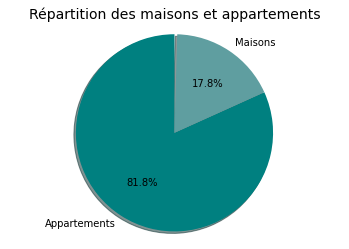

In [ ]:
#@title
#On crée un diagramme circulaire représentant la répartition des maisons et appartements 
import matplotlib.pyplot as plt

labels = 'Appartements', 'Maisons'
sizes = [vpropmaison, vpropappart]
colors = ['teal', 'cadetblue']

plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')

plt.savefig('PieChart01.png')
plt.title('Répartition des maisons et appartements', fontsize=14)
plt.show()

In [ ]:
#@title
#On calcule le nombre de résidence principale 
vnbrp = sum(val_ville['P17_RP'])
print("Nombre de résidences principales : {:.0f}".format(vnbrp))

#On calcule la proportion des résidences principales
vproprp = vnbrp/vnblog
vproprp = (vnbrp/vnblog)
print("Proportion des résidences principales par rapport à l'ensemble : {:.2%}".format(vproprp))


Nombre de résidences principales : 399
Proportion des résidences principales par rapport à l'ensemble : 85.99%


In [ ]:
#@title
#On calcule le nombre de résidence secondaire occasionnelle 
vnbrso = sum(val_ville['P17_RSECOCC'])
print("Nombre de résidences secondaires occasionnelles : {:.0f}".format(vnbrso))

#On calcule le nombre de résidences de vacances
vnbvac = sum(val_ville['P17_LOGVAC'])
print("Nombre de logements vacances : {:.0f}".format(vnbvac))

#On calcule la proportion des résidences secondaires occasionnels 
vproprso = (vnbrso+vnbvac)/vnblog
print("Proportion des résidences secondaires occasionnels par rapport à l'ensemble : {:.2%}".format(vproprso))

Nombre de résidences secondaires occasionnelles : 25
Nombre de logements vacances : 40
Proportion des résidences secondaires occasionnels par rapport à l'ensemble : 14.01%


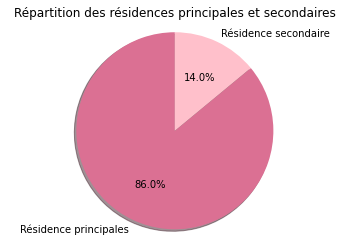

In [ ]:
#@title
#On crée un diagramme circulaire représentant la répartition des résidences principales et secondaires

labels = 'Résidence principales', 'Résidence secondaire',
sizes = [vproprp, vproprso]
colors = ['palevioletred', 'pink']

plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')

plt.savefig('PieChart01.png')
plt.title('Répartition des résidences principales et secondaires', fontsize=12)
plt.show()

In [ ]:
#@title
#On télecharge la bibliothèque folium, elle permet la conception de cartes interactives. 
import folium as fl

In [ ]:
#@title
#On va rechercher la latitude et la longitude en fonction de la ville
loc = valeur[valeur.nom_commune == Ville][['nom_commune','latitude','longitude']].reset_index().head(1)
loc

,index,nom_commune,latitude,longitude
0,15366,Sainte-Catherine,45.610473,4.596787


In [ ]:
#@title
# On a créé un icône sur le lieu géographique de la ville et en info-bulle on retrouve le nom de la ville
m = fl.Map(location=[45.7,4.7], zoom_start=9)
for i in range(len(loc)):
  fl.Marker(location=[loc.latitude.iloc[i],loc.longitude.iloc[i]], popup = f'{loc.nom_commune.iloc[i]}').add_to(m)
m